# Análise Hospedagens
Neste notebook ficarão análises que utilizam os datasets dos meios de hospedagens cadastradas pelo ministerio do turismo do Brasil.Os datasets utilizados nesta análise são provinientes do site de dados abertos do governo Brasileiro (http://dados.gov.br). obs: os datasets foram baixados e estão na pasta Datasets desse Trabalho.


# Motivação
Tema : Turismo

<strong>Turistas</strong>
* A escolha de um destino por alguém depende de uma série de fatores, como atrativos turísticos, a hospitalidade do local, os eventos disponíveis, a estrutura oferecida, sinalização adequada, transporte de qualidade e segurança.

<strong>Hospedagens</strong>
* Diversificação de serviços e qualidade ao prestá-los.

# Ponto Chave

Tanto para o <strong>turista ter uma boa experiencia</strong> em sua visita quanto para a <strong>hospedagem fazer um atendimento de qualidade</strong>, a <strong>comunicação</strong> é essencial.

# Hipoteses
* Os idiomas oferecidos pelas hospedagens influenciam no fluxo de turistas no local.
* A quantidade de turistas em certa região influencia no investimento por parte das hospedagens em certos serviços.

Vamos análisar os estados do RS,RJ,SP e PR pois atraves de nossa análise no notebook(Análise Turistas) descobrimos que há uma maior concentração de turistas nesses locais.

### Imports

In [1]:
import pandas as pd
import numpy as np

from nltk.tokenize import sent_tokenize , word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

<h1>Carregando Dados</h1>
<p>Dados de hospedagens cadastradas pelo ministerio do turismo</p>

In [2]:
##Carregando dados 2014
dados_2014 = pd.read_csv('Datasets/MeiodeHospedagem2014CadasturPJ.csv',encoding='latin-1',sep=';')

##Carregando dados 2015
dados_2015 = pd.read_csv('Datasets/MeiodeHospedagem2015CadasturPJ.csv',encoding='latin-1',sep=';')

##Carregando dados 2016
dados_2016_01 = pd.read_csv('Datasets/hospedagem_2016_01.csv',encoding='latin-1',sep=';')
dados_2016_02 = pd.read_csv('Datasets/hospedagem_2016_02.csv',encoding='latin-1',sep=';')
dados_2016_03 = pd.read_csv('Datasets/hospedagem_2016_03.csv',encoding='latin-1',sep=';')
dados_2016_04 = pd.read_csv('Datasets/hospedagem_2016_04.csv',encoding='latin-1',sep=';')

##Carregando dados 2017
dados_2017_01 = pd.read_csv('Datasets/MeiodeHospedagem201701TrimestreCadasturPJ.csv',encoding='latin-1',sep=';')
dados_2017_02 = pd.read_csv('Datasets/MeiodeHospedagem201702TrimestreCadasturPJ.csv',encoding='latin-1',sep=';')
dados_2017_03 = pd.read_csv('Datasets/MeiodeHospedagem201703TrimestreCadasturPJ.csv',encoding='latin-1',sep=';')
dados_2017_04 = pd.read_csv('Datasets/MeiodeHospedagem201704TrimestreCadasturPJ.csv',encoding='latin-1',sep=';')

# Dados obtidos da Análise de Turistas
chegadas2014 = pd.read_csv('chegadas2014.csv',encoding='latin-1',sep=',')
chegadas2015 = pd.read_csv('chegadas2015.csv',encoding='latin-1',sep=',')
chegadas2016 = pd.read_csv('chegadas2016.csv',encoding='latin-1',sep=',')
chegadas2017 = pd.read_csv('chegadas2017.csv',encoding='latin-1',sep=',')


In [3]:
## Colunas dos Dados
print(dados_2014.columns)
print(dados_2015.columns)
print(dados_2016_04.columns)
print(dados_2017_04.columns)

Index(['RAZÃO SOCIAL', 'NOME FANTASIA', 'CNPJ', 'NATUREZA JURIDICA',
       'DATA INICIO OPERAÇÃO', 'PORTE', 'SITUAÇÃO', 'TIPO ATIVIDADE',
       'SUBTIPO ATIVIDADE', 'CEP', 'UF', 'LOCALIDADE', 'BAIRRO', 'LOGRADOURO',
       'TELEFONE', 'FAX', 'E-MAIL2', 'E-MAIL3', 'SITE', 'CÓDIGO CERTIFICADO',
       'CÓDIGO E DESCRIÇÃO CNAE', 'UH', 'UHs ACESSÍVEIS', 'UHs PARA CAO GUIA',
       'UHs TPS', 'TOTAL DE LEITOS', 'LINGUAS', 'SEGMENTOS TURISTICOS',
       'SERVIÇOS', 'EQUIPAMENTOS'],
      dtype='object')
Index(['RAZÃO SOCIAL', 'NOME FANTASIA', 'CNPJ', 'NATUREZA JURIDICA',
       'DATA INICIO OPERAÇÃO', 'PORTE', 'SITUAÇÃO', 'TIPO ATIVIDADE',
       'SUBTIPO ATIVIDADE', 'CEP', 'UF', 'LOCALIDADE', 'BAIRRO', 'LOGRADOURO',
       'TELEFONE', 'FAX', 'E-MAIL2', 'E-MAIL3', 'SITE', 'CÓDIGO CERTIFICADO',
       'CÓDIGO E DESCRIÇÃO CNAE', 'UH', 'UHs ACESSÍVEIS', 'UHs PARA CAO GUIA',
       'UHs TPS', 'TOTAL DE LEITOS', 'LINGUAS', 'SEGMENTOS TURISTICOS',
       'SERVIÇOS', 'EQUIPAMENTOS'],
      dtype=

## Função Análise de Hospedagens
<p>Esta função <strong>análisa/filtra</strong> os dados oriundos dos CSV's,dentro da pasta <strong>Datasets</strong>, correspondentes dos <strong>meios de hospedagens</strong></p>

In [4]:
def AnaliseDadosHospedagens(dataFrame_Hospedagens):
    ##Escolhendo colunas
    dados = pd.DataFrame(dataFrame_Hospedagens,columns = ['UF','CNPJ','SITUAÇÃO', 'LINGUAS']) 

    ## Hospedagens que estão funcionando
    dados = dados[dados.SITUAÇÃO.str.contains('Em Operação')]

    ## Eliminando dados inválidos
    dados = dados.dropna()
    
    ## Pegando todos os idiomas oferecidos pelas hospedagens deixando de lado aqueles que não tem nenhum idioma
    allIdiomas = []
    for valor in dados.LINGUAS:
        valor_tokenize = word_tokenize(valor)
        for palavra in valor_tokenize:
            if (len(palavra) > 4) and (palavra != 'Nenhuma') and (palavra != 'Opções'):
                allIdiomas.append(palavra)

    linguas = set(allIdiomas)
    
    print(linguas)
    
    # Adicionando valores as coluncas de idiomas oferecidos
    for lingua in linguas:
        dados.loc[dados['LINGUAS'].str.contains(lingua),lingua] = 1
    
    return dados

# Dados dos anos 2014-2015

In [5]:
# dados 2014
dados_2014 = AnaliseDadosHospedagens(dados_2014)
display(dados_2014.head())

{'Dinamarquês', 'Hebraico', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Inglês', 'Francês', 'Mandarim', 'Russo', 'Sueco'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Dinamarquês,Hebraico,Espanhol,Alemão,Italiano,Japonês,Inglês,Francês,Mandarim,Russo,Sueco
0,MA,13.458.024/0001-30,Em Operação,"(""Francês,Inglês,Italiano"")",NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
1,RS,10.581.146/0001-21,Em Operação,"(""Nenhuma das Opções"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP,19.179.682/0001-70,Em Operação,"(""Inglês,Espanhol"")",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,SP,19.138.838/0001-74,Em Operação,"(""Inglês,Espanhol"")",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,SP,19.138.796/0001-71,Em Operação,"(""Inglês,Espanhol"")",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [6]:
# dados 2015
dados_2015 = AnaliseDadosHospedagens(dados_2015)
display(dados_2015.head())

{'Hebraico', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Espanhol,Alemão,Italiano,Japonês,Inglês,Francês,Mandarim,Russo
0,MA,13.458.024/0001-30,Em Operação,"(""Francês,Inglês,Italiano"")",NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN
1,RS,10.581.146/0001-21,Em Operação,"(""Nenhuma das Opções"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP,19.179.682/0001-70,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.138.838/0001-74,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.796/0001-71,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


# Dados dos anos 2016-2017

## 1 Trimestre
<p>Análise dos <strong>dados</strong> das hospedagens nos meses de <strong>Janeiro</strong>,<strong>Fevereiro</strong> e <strong>Março</strong><p>

In [7]:
# dados 1 trimestre 2016
dados_2016_01 = AnaliseDadosHospedagens(dados_2016_01)
display(dados_2016_01.head())

{'Hebraico', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Espanhol,Alemão,Italiano,Japonês,Inglês,Francês,Mandarim,Russo
0,MA,13.458.024/0001-30,Em Operação,"(""Francês,Inglês,Italiano"")",NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN
1,RS,10.581.146/0001-21,Em Operação,"(""Nenhuma das Opções"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP,19.179.682/0001-70,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.138.838/0001-74,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.796/0001-71,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [8]:
# dados 1 trimestre 2017
dados_2017_01 = AnaliseDadosHospedagens(dados_2017_01)
display(dados_2017_01.head())

{'Hebraico', 'Eslovaco', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Catalão', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Eslovaco,Espanhol,Alemão,Italiano,Japonês,Catalão,Inglês,Francês,Mandarim,Russo
0,MA,13.458.024/0001-30,Em Operação,"Italiano ,Francês ,Inglês",NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
1,BA,17.498.787/0001-66,Em Operação,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,SP,19.179.682/0001-70,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.138.838/0001-74,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.796/0001-71,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## 2 Trimestre
<p>Análise dos <strong>dados</strong> das hospedagens nos meses de <strong>Abril</strong>,<strong>Maio</strong> e <strong>Junho</strong><p>

In [9]:
# dados 2 trimestre 2016
dados_2016_02 = AnaliseDadosHospedagens(dados_2016_02)
display(dados_2016_02.head())

{'Hebraico', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Espanhol,Alemão,Italiano,Japonês,Inglês,Francês,Mandarim,Russo
0,MA,13.458.024/0001-30,Em Operação,"(""Francês,Inglês,Italiano"")",NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN
1,RS,10.581.146/0001-21,Em Operação,"(""Nenhuma das Opções"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP,19.179.682/0001-70,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.138.838/0001-74,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.796/0001-71,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [10]:
# dados 2 trimestre 2017
dados_2017_02 = AnaliseDadosHospedagens(dados_2017_02)
display(dados_2017_02.head())

{'Hebraico', 'Eslovaco', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Catalão', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Eslovaco,Espanhol,Alemão,Italiano,Japonês,Catalão,Inglês,Francês,Mandarim,Russo
0,GO,26.672.631/0001-40,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,MA,13.458.024/0001-30,Em Operação,"Italiano ,Francês ,Inglês",NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
2,BA,17.498.787/0001-66,Em Operação,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.179.682/0001-70,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.838/0001-74,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## 3 Trimestre
<p>Análise dos <strong>dados</strong> das hospedagens nos meses de <strong>Julho</strong>,<strong>Agosto</strong> e <strong>Setembro</strong><p>

In [11]:
#dados 3-trimestre de 2016
dados_2016_03 = AnaliseDadosHospedagens(dados_2016_03)
display(dados_2016_03.head())

{'Hebraico', 'Eslovaco', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Eslovaco,Espanhol,Alemão,Italiano,Japonês,Inglês,Francês,Mandarim,Russo
0,MA,13.458.024/0001-30,Em Operação,"Italiano ,Francês ,Inglês",NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN
1,SP,19.179.682/0001-70,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,SP,19.138.838/0001-74,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.138.796/0001-71,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.891/0001-75,Em Operação,Nenhuma das Opções,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# dados 3-trimestre 2017
dados_2017_03 = AnaliseDadosHospedagens(dados_2017_03)
display(dados_2017_03.head())

{'Hebraico', 'Eslovaco', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Catalão', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Eslovaco,Espanhol,Alemão,Italiano,Japonês,Catalão,Inglês,Francês,Mandarim,Russo
0,GO,26.672.631/0001-40,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,MA,13.458.024/0001-30,Em Operação,"Italiano ,Francês ,Inglês",NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
2,BA,17.498.787/0001-66,Em Operação,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.179.682/0001-70,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.838/0001-74,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## 4 Trimestre
<p>Análise dos <strong>dados</strong> das hospedagens nos meses de <strong>Outubro</strong>,<strong>Novembro</strong> e <strong>Dezembro</strong><p>

In [13]:
# dados 4-rimestre 2016
dados_2016_04 = AnaliseDadosHospedagens(dados_2016_04)
display(dados_2016_04.head())

{'Hebraico', 'Eslovaco', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Catalão', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Eslovaco,Espanhol,Alemão,Italiano,Japonês,Catalão,Inglês,Francês,Mandarim,Russo
0,MA,13.458.024/0001-30,Em Operação,"Italiano ,Francês ,Inglês",NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
1,SP,19.179.682/0001-70,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,SP,19.138.838/0001-74,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.138.796/0001-71,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.891/0001-75,Em Operação,Nenhuma das Opções,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# dados 4-rimestre 2017
dados_2017_04 = AnaliseDadosHospedagens(dados_2017_04)
display(dados_2017_04.head())

{'Hebraico', 'Eslovaco', 'Espanhol', 'Alemão', 'Italiano', 'Japonês', 'Catalão', 'Inglês', 'Francês', 'Mandarim', 'Russo'}


,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Eslovaco,Espanhol,Alemão,Italiano,Japonês,Catalão,Inglês,Francês,Mandarim,Russo
0,GO,26.672.631/0001-40,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,MA,13.458.024/0001-30,Em Operação,"Italiano ,Francês ,Inglês",NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
2,BA,17.498.787/0001-66,Em Operação,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.179.682/0001-70,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.838/0001-74,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Agrupamento dos Dados dos Trimestres 2016-2017

In [15]:
def UniaoDataframes(dataFrame1,dataFrame2,dataFrame3,dataFrame4):
    dados1 = pd.merge(dataFrame1,dataFrame2,how='outer')
    dados2 = pd.merge(dataFrame3,dataFrame4,how='outer')
    dados = pd.merge(dados1 , dados2 , how='outer')
    return dados

In [16]:
dados_2016 = UniaoDataframes(dados_2016_01,dados_2016_02,dados_2016_03,dados_2016_04)
dados_2016.head()

,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Espanhol,Alemão,Italiano,Japonês,Inglês,Francês,Mandarim,Russo,Eslovaco,Catalão
0,MA,13.458.024/0001-30,Em Operação,"(""Francês,Inglês,Italiano"")",NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1,RS,10.581.146/0001-21,Em Operação,"(""Nenhuma das Opções"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP,19.179.682/0001-70,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,SP,19.138.838/0001-74,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,SP,19.138.796/0001-71,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [17]:
dados_2017 = UniaoDataframes(dados_2017_01,dados_2017_02,dados_2017_03,dados_2017_04)
dados_2017.head()

,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Eslovaco,Espanhol,Alemão,Italiano,Japonês,Catalão,Inglês,Francês,Mandarim,Russo
0,MA,13.458.024/0001-30,Em Operação,"Italiano ,Francês ,Inglês",NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN
1,BA,17.498.787/0001-66,Em Operação,Inglês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,SP,19.179.682/0001-70,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,SP,19.138.838/0001-74,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,SP,19.138.796/0001-71,Em Operação,"Espanhol ,Inglês",NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


# Funções - Regiões
<p><strong>Filtrando</strong> os dados por <strong>região</strong></p>

### Região Norte

In [18]:
def RegiaoNorte(data_frame):
    # Lista de estados da região norte
    regiaoNorte = ['AM','RR','AP','PA','TO','RO','AC']  
    
    dadosNorte = data_frame[data_frame.UF.isin(regiaoNorte)]
   
    return dadosNorte

### Região Nordeste

In [19]:
def RegiaoNordeste(data_frame):
    # Lista de estados da região nordeste
    regiaoNordeste = ['MA','PI','CE','RN','PE','PB','SE','AL','BA']  
    
    dadosNordeste = data_frame[data_frame.UF.isin(regiaoNordeste)]
   
    return dadosNordeste

### Região Sul

In [20]:
def RegiaoSul(data_frame):
    # Lista de estados da região Sul
    regiaoSul = ['PR','RS','SC']  
    
    dadosSul = data_frame[data_frame.UF.isin(regiaoSul)]
   
    return dadosSul

### Região Sudeste

In [21]:
def RegiaoSudeste(data_frame):
    # Lista de estados da região sudeste
    regiaoSudeste = ['SP','RJ','ES','MG']  
    
    dadosSudeste = data_frame[data_frame.UF.isin(regiaoSudeste)]
   
    return dadosSudeste

### Região Centro-Oeste

In [22]:
def RegiaoCentroOeste(data_frame):
    # Lista de estados por região centro-oeste
    regiaoCentroOeste = ['MT','MS','GO','DF']
    
    dadosCentroOeste = data_frame[data_frame.UF.isin(regiaoCentroOeste)]
    
    return dadosCentroOeste

# Função - Estados

### EstadoUF
<p>Função que <strong>filtra</strong> os dados para um dataframe, que contem dados de<strong> um estado</strong></p>

In [23]:
def EstadoUF(data_Frame,UF):
    dadosEstado = data_Frame[data_Frame.UF == UF]
    return dadosEstado

<p>Exemplo da função <strong>EstadoUF</strong>, mostrando os dados de <strong>Pernambuco</strong> do <strong>1 trimestre</strong></p>

In [24]:
# Exemplo da função EstadoUF - com estado de pernambuco - trimestre 1
dados_2016_01_PE = EstadoUF(dados_2016_01,'PE')
dados_2016_01_PE.head()

,UF,CNPJ,SITUAÇÃO,LINGUAS,Hebraico,Espanhol,Alemão,Italiano,Japonês,Inglês,Francês,Mandarim,Russo
21,PE,00.569.739/0001-19,Em Operação,(Inglês),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
145,PE,73.917.528/0001-01,Em Operação,"(""Inglês,Italiano,Espanhol"")",NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
157,PE,19.945.875/0001-94,Em Operação,"(""Inglês,Espanhol"")",NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
173,PE,04.012.313/0001-10,Em Operação,(Inglês),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
196,PE,05.034.109/0001-63,Em Operação,"(""Nenhuma das Opções"")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Função Contador
<p>Funções <strong>Contador</strong> retornam dicionarios com a <strong>quantidade de hospedagens</strong> que <strong>oferecem x idioma</strong></p>

In [25]:
def contador_2016(dataFrame):
    linguas = ['Russo','Italiano','Alemão','Francês','Espanhol','Mandarim','Japonês','Hebraico','Inglês','Eslovaco','Catalão']
    dicionario = {} 
    for lingua in linguas:
        qtd = dataFrame[lingua].sum().astype(int)
        dicionario[lingua] = qtd
    return dicionario

def contador_2017(dataFrame):
    linguas = ['Espanhol', 'Inglês', 'Italiano', 'Francês', 'Alemão', 'Japonês', 'Hebraico', 'Russo', 'Mandarim', 'Eslovaco', 'Catalão']
    dicionario = {} 
    for lingua in linguas:
        qtd = dataFrame[lingua].sum().astype(int)
        dicionario[lingua] = qtd
    return dicionario

def contador_2014(dataFrame):
    linguas = ['Francês', 'Inglês', 'Italiano', 'Espanhol', 'Alemão', 'Japonês', 'Russo', 'Mandarim', 'Hebraico', 'Sueco', 'Dinamarquês']
    dicionario = {} 
    for lingua in linguas:
        qtd = dataFrame[lingua].sum().astype(int)
        dicionario[lingua] = qtd
    return dicionario

def contador_2015(dataFrame):
    linguas = ['Francês', 'Inglês', 'Italiano', 'Espanhol', 'Alemão', 'Japonês', 'Hebraico', 'Russo', 'Mandarim']
    dicionario = {} 
    for lingua in linguas:
        qtd = dataFrame[lingua].sum().astype(int)
        dicionario[lingua] = qtd
    return dicionario

## Funções - Média e Ano
* Média : retorna dataframe com as medias das qtd de hospedagens que oferecem X lingua estrangeira.
* Ano: add o ano dos dados.

In [26]:
# função cria um dataframe com a media dos valores
def media(dataFrame):
    dados = pd.DataFrame([dataFrame.mean().to_dict()])
    return dados
    # acrescenta o ano
def ano(dados,ano):
    dados['Ano'] = pd.Period(ano)
    return dados

### Funções - Dados
<p>Retornam dataframes com os valores discretizados que serão usados para comprovar ou refutar a hipotese</p>

In [27]:
def dados2014(dataFrame,uf):
    dados = pd.DataFrame([contador_2014(EstadoUF(dataFrame,uf))])
    dados = media(dados)
    dados = ano(dados,'2014')
    return dados

def dados2015(dataFrame,uf):
    dados = pd.DataFrame([contador_2015(EstadoUF(dataFrame,uf))])
    dados = media(dados)
    dados = ano(dados,'2015')
    return dados

def dados2016(dataFrame,uf):
    dados = pd.DataFrame([contador_2016(EstadoUF(dataFrame,uf))])
    dados = media(dados)
    dados = ano(dados,'2016')
    return dados

def dados2017(dataFrame,uf):
    dados = pd.DataFrame([contador_2017(EstadoUF(dataFrame,uf))])
    dados = media(dados)
    dados = ano(dados,'2017')
    return dados

### Função Dados
<p>Concatena os dados dos anos 2014-2017</p>

In [28]:
def Dados(dataFrame1,dataFrame2,dataFrame3,dataFrame4):
    lista =  [dataFrame1,dataFrame2,dataFrame3,dataFrame4]
    dados = pd.concat(lista)
    return dados

### Função AnaliseChegadas
<p>Retorna o total de Turistas de Y País que chegou em X Estado</p>

In [29]:
# retorna apenas a linha do pais com mais turistas.
def AnaliseChegadas(dataFrame,nomeEstado):
    dados1 = dataFrame[dataFrame.UF == nomeEstado]
    dados = pd.DataFrame(dados1.groupby(['País']).Chegadas.sum()).sort_values('Chegadas', ascending=False)
    dados = dados.iloc[[0]]
    return dados

### Países com mais Turistas por Estado(RS,RJ,SP e PR) no intervalo de 2014-2017

In [30]:
rj2014 = AnaliseChegadas(chegadas2014,'Rio de Janeiro')
rj2015 = AnaliseChegadas(chegadas2015,'Rio de Janeiro')
rj2016 = AnaliseChegadas(chegadas2016,'Rio de Janeiro')
rj2017 = AnaliseChegadas(chegadas2017,'Rio de Janeiro')

display(rj2014,rj2015,rj2016,rj2017)

,Chegadas
País,
Argentina,284795


,Chegadas
País,
Argentina,342765


,Chegadas
País,
Argentina,377677


,Chegadas
País,
Argentina,452842


In [31]:
rs2014 = AnaliseChegadas(chegadas2014,'Rio Grande do Sul')
rs2015 = AnaliseChegadas(chegadas2015,'Rio Grande do Sul')
rs2016 = AnaliseChegadas(chegadas2016,'Rio Grande do Sul')
rs2017 = AnaliseChegadas(chegadas2017,'Rio Grande do Sul')
display(rs2014,rs2015,rs2016,rs2017)

,Chegadas
País,
Argentina,679138


,Chegadas
País,
Argentina,856645


,Chegadas
País,
Argentina,895937


,Chegadas
País,
Argentina,1021639


In [32]:
sp2014 = AnaliseChegadas(chegadas2014,'São Paulo')
sp2015 = AnaliseChegadas(chegadas2015,'São Paulo')
sp2016 = AnaliseChegadas(chegadas2016,'São Paulo')
sp2017 = AnaliseChegadas(chegadas2017,'São Paulo')
display(sp2014,sp2015,sp2016,sp2017)

,Chegadas
País,
Argentina,339756


,Chegadas
País,
Argentina,376133


,Chegadas
País,
Argentina,399092


,Chegadas
País,
Argentina,398926


In [33]:
pr2014 = AnaliseChegadas(chegadas2014,'Paraná')
pr2015 = AnaliseChegadas(chegadas2015,'Paraná')
pr2016 = AnaliseChegadas(chegadas2016,'Paraná')
pr2017 = AnaliseChegadas(chegadas2017,'Paraná')
display(pr2014,pr2015,pr2016,pr2017)

,Chegadas
País,
Argentina,273817


,Chegadas
País,
Argentina,257355


,Chegadas
País,
Argentina,274811


,Chegadas
País,
Argentina,351206


## Análise dos Dados Rio Grande do Sul

## 2014
<p><strong>Média da quantia</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>RS</strong></p>

In [34]:
dadosRS_2014 = dados2014(dados_2014,'RS')
dadosRS_2014

,Alemão,Dinamarquês,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Ano
0,80.0,0.0,360.0,25.0,0.0,310.0,51.0,1.0,2.0,2.0,0.0,2014


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>RS</strong></p>

In [35]:
chegadas2014RS = ano(media(AnaliseChegadas(chegadas2014,'Rio Grande do Sul')),'2014')
chegadas2014RS

,Chegadas,Ano
0,679138.0,2014


## 2015
<p><strong>Média da quantia</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>RS</strong></p>

In [36]:
dadosRS_2015 = dados2015(dados_2015,'RS')
dadosRS_2015

,Alemão,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,61.0,281.0,20.0,0.0,262.0,41.0,1.0,3.0,2.0,2015


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>RS</strong></p>

In [37]:
chegadas2015RS = ano(media(AnaliseChegadas(chegadas2015,'Rio Grande do Sul')),'2015')
chegadas2015RS

,Chegadas,Ano
0,856645.0,2015


## 2016
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>RS</strong></p>

In [38]:
dadosRS_2016 = dados2016(dados_2016,'RS')
dadosRS_2016

,Alemão,Catalão,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,116.0,0.0,0.0,534.0,36.0,0.0,512.0,75.0,2.0,5.0,4.0,2016


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>RS</strong></p>

In [39]:
chegadas2016RS = ano(media(AnaliseChegadas(chegadas2016,'Rio Grande do Sul')),'2016')
chegadas2016RS

,Chegadas,Ano
0,895937.0,2016


## 2017
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>RS</strong></p>

In [40]:
dadosRS_2017 = dados2017(dados_2017,'RS')
dadosRS_2017

,Alemão,Catalão,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,72.0,0.0,0.0,301.0,21.0,0.0,288.0,40.0,1.0,2.0,2.0,2017


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>RS</strong></p>

In [41]:
chegadas2017RS = ano(media(AnaliseChegadas(chegadas2017,'Rio Grande do Sul')),'2017')
chegadas2017RS

,Chegadas,Ano
0,1021639.0,2017


### Dataframe com os valores dos anos 2014-2017 | RS

In [42]:
dados_Hospedagens_RS = Dados(dadosRS_2014,dadosRS_2015,dadosRS_2016,dadosRS_2017)
dados_Hospedagens_RS

C:\Users\Usuário\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,Alemão,Ano,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco
0,80.0,2014,NaN,0.0,NaN,360.0,25.0,0.0,310.0,51.0,1.0,2.0,2.0,0.0
0,61.0,2015,NaN,NaN,NaN,281.0,20.0,0.0,262.0,41.0,1.0,3.0,2.0,NaN
0,116.0,2016,0.0,NaN,0.0,534.0,36.0,0.0,512.0,75.0,2.0,5.0,4.0,NaN
0,72.0,2017,0.0,NaN,0.0,301.0,21.0,0.0,288.0,40.0,1.0,2.0,2.0,NaN


In [43]:
dados_Chegadas_RS = Dados(chegadas2014RS,chegadas2015RS,chegadas2016RS,chegadas2017RS)
dados_Chegadas_RS

,Chegadas,Ano
0,679138.0,2014
0,856645.0,2015
0,895937.0,2016
0,1021639.0,2017


In [44]:
dadosRS = pd.merge(dados_Hospedagens_RS,dados_Chegadas_RS,how='outer')
dadosRS.rename(columns={'Chegadas': 'Chegadas_Argentina'}, inplace=True)
dadosRS

,Alemão,Ano,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Chegadas_Argentina
0,80.0,2014,NaN,0.0,NaN,360.0,25.0,0.0,310.0,51.0,1.0,2.0,2.0,0.0,679138.0
1,61.0,2015,NaN,NaN,NaN,281.0,20.0,0.0,262.0,41.0,1.0,3.0,2.0,NaN,856645.0
2,116.0,2016,0.0,NaN,0.0,534.0,36.0,0.0,512.0,75.0,2.0,5.0,4.0,NaN,895937.0
3,72.0,2017,0.0,NaN,0.0,301.0,21.0,0.0,288.0,40.0,1.0,2.0,2.0,NaN,1021639.0


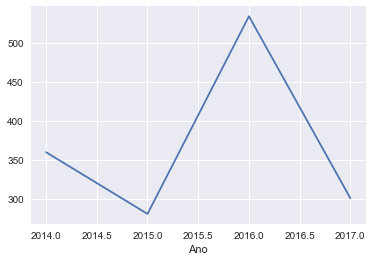

In [45]:
dadosRS.groupby(dadosRS.Ano.dt.year).Espanhol.mean().plot()

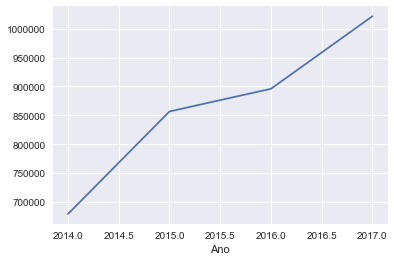

In [46]:
dadosRS.groupby(dadosRS.Ano.dt.year).Chegadas_Argentina.mean().plot()

## Análise dos Dados Rio de Janeiro

## 2014
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>RJ</strong></p>

In [47]:
dadosRJ_2014 = dados2014(dados_2014,'RJ')
dadosRJ_2014

,Alemão,Dinamarquês,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Ano
0,57.0,0.0,450.0,146.0,3.0,564.0,79.0,6.0,1.0,9.0,0.0,2014


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>RJ</strong></p>

In [48]:
chegadas2014RJ = ano(media(AnaliseChegadas(chegadas2014,'Rio de Janeiro')),'2014')
chegadas2014RJ

,Chegadas,Ano
0,284795.0,2014


## 2015
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>RJ</strong></p>

In [49]:
dadosRJ_2015 = dados2015(dados_2015,'RJ')
dadosRJ_2015

,Alemão,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,52.0,434.0,135.0,5.0,534.0,75.0,5.0,1.0,9.0,2015


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>RJ</strong></p>

In [50]:
chegadas2015RJ = ano(media(AnaliseChegadas(chegadas2015,'Rio de Janeiro')),'2015')
chegadas2015RJ

,Chegadas,Ano
0,342765.0,2015


## 2016
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>RJ</strong></p>

In [51]:
dadosRJ_2016 = dados2016(dados_2016,'RJ')
dadosRJ_2016

,Alemão,Catalão,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,107.0,0.0,0.0,952.0,301.0,9.0,1197.0,162.0,18.0,5.0,21.0,2016


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>RJ</strong></p>

In [52]:
chegadas2016RJ = ano(media(AnaliseChegadas(chegadas2016,'Rio de Janeiro')),'2016')
chegadas2016RJ

,Chegadas,Ano
0,377677.0,2016


## 2017
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>RJ</strong></p>

In [53]:
dadosRJ_2017 = dados2017(dados_2017,'RJ')
dadosRJ_2017

,Alemão,Catalão,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,56.0,0.0,0.0,616.0,186.0,4.0,764.0,94.0,12.0,3.0,12.0,2017


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>RJ</strong></p>

In [54]:
chegadas2017RJ = ano(media(AnaliseChegadas(chegadas2017,'Rio de Janeiro')),'2017')
chegadas2017RJ

,Chegadas,Ano
0,452842.0,2017


### Dataframe com os valores dos anos 2014-2017 | RJ

In [55]:
dados_Hospedagens_RJ = Dados(dadosRJ_2014,dadosRJ_2015,dadosRJ_2016,dadosRJ_2017)
dados_Hospedagens_RJ

C:\Users\Usuário\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,Alemão,Ano,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco
0,57.0,2014,NaN,0.0,NaN,450.0,146.0,3.0,564.0,79.0,6.0,1.0,9.0,0.0
0,52.0,2015,NaN,NaN,NaN,434.0,135.0,5.0,534.0,75.0,5.0,1.0,9.0,NaN
0,107.0,2016,0.0,NaN,0.0,952.0,301.0,9.0,1197.0,162.0,18.0,5.0,21.0,NaN
0,56.0,2017,0.0,NaN,0.0,616.0,186.0,4.0,764.0,94.0,12.0,3.0,12.0,NaN


In [56]:
dados_Chegadas_RJ = Dados(chegadas2014RJ,chegadas2015RJ,chegadas2016RJ,chegadas2017RJ)
dados_Chegadas_RJ

,Chegadas,Ano
0,284795.0,2014
0,342765.0,2015
0,377677.0,2016
0,452842.0,2017


In [57]:
dadosRJ = pd.merge(dados_Hospedagens_RJ,dados_Chegadas_RJ,how='outer')
dadosRJ.rename(columns={'Chegadas': 'Chegadas_Argentina'}, inplace=True)
dadosRJ

,Alemão,Ano,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Chegadas_Argentina
0,57.0,2014,NaN,0.0,NaN,450.0,146.0,3.0,564.0,79.0,6.0,1.0,9.0,0.0,284795.0
1,52.0,2015,NaN,NaN,NaN,434.0,135.0,5.0,534.0,75.0,5.0,1.0,9.0,NaN,342765.0
2,107.0,2016,0.0,NaN,0.0,952.0,301.0,9.0,1197.0,162.0,18.0,5.0,21.0,NaN,377677.0
3,56.0,2017,0.0,NaN,0.0,616.0,186.0,4.0,764.0,94.0,12.0,3.0,12.0,NaN,452842.0


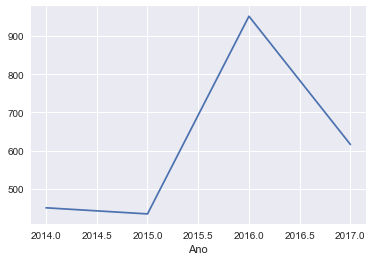

In [58]:
dadosRJ.groupby(dadosRJ.Ano.dt.year).Espanhol.mean().plot()

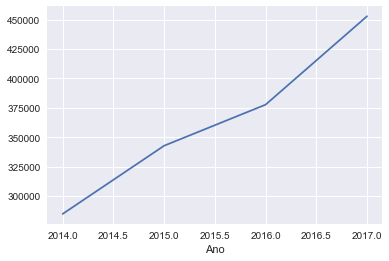

In [59]:
dadosRJ.groupby(dadosRJ.Ano.dt.year).Chegadas_Argentina.mean().plot()

## Análise dos Dados São Paulo

## 2014
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>SP</strong></p>

In [60]:
dadosSP_2014 = dados2014(dados_2014,'SP')
dadosSP_2014

,Alemão,Dinamarquês,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Ano
0,33.0,0.0,453.0,70.0,3.0,648.0,52.0,41.0,4.0,4.0,0.0,2014


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>SP</strong></p>

In [61]:
chegadas2014SP = ano(media(AnaliseChegadas(chegadas2014,'São Paulo')),'2014')
chegadas2014SP

,Chegadas,Ano
0,339756.0,2014


## 2015
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>SP</strong></p>

In [62]:
dadosSP_2015 = dados2015(dados_2015,'SP')
dadosSP_2015

,Alemão,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,29.0,476.0,78.0,2.0,687.0,50.0,39.0,5.0,6.0,2015


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>SP</strong></p>

In [63]:
chegadas2015SP = ano(media(AnaliseChegadas(chegadas2015,'São Paulo')),'2015')
chegadas2015SP

,Chegadas,Ano
0,376133.0,2015


## 2016
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>SP</strong></p>

In [64]:
dadosSP_2016 = dados2016(dados_2016,'SP')
dadosSP_2016

,Alemão,Catalão,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,63.0,0.0,0.0,1027.0,165.0,4.0,1478.0,119.0,87.0,9.0,11.0,2016


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>SP</strong></p>

In [65]:
chegadas2016SP = ano(media(AnaliseChegadas(chegadas2016,'São Paulo')),'2016')
chegadas2016SP

,Chegadas,Ano
0,399092.0,2016


## 2017
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>SP</strong></p>

In [66]:
dadosSP_2017 = dados2017(dados_2017,'SP')
dadosSP_2017

,Alemão,Catalão,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,42.0,0.0,0.0,620.0,99.0,3.0,891.0,76.0,48.0,4.0,8.0,2017


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>SP</strong></p>

In [67]:
chegadas2017SP = ano(media(AnaliseChegadas(chegadas2017,'São Paulo')),'2017')
chegadas2017SP

,Chegadas,Ano
0,398926.0,2017


### Dataframe com os valores dos anos 2014-2017 | SP

In [68]:
dados_Hospedagens_SP = Dados(dadosSP_2014,dadosSP_2015,dadosSP_2016,dadosSP_2017)
dados_Hospedagens_SP

C:\Users\Usuário\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,Alemão,Ano,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco
0,33.0,2014,NaN,0.0,NaN,453.0,70.0,3.0,648.0,52.0,41.0,4.0,4.0,0.0
0,29.0,2015,NaN,NaN,NaN,476.0,78.0,2.0,687.0,50.0,39.0,5.0,6.0,NaN
0,63.0,2016,0.0,NaN,0.0,1027.0,165.0,4.0,1478.0,119.0,87.0,9.0,11.0,NaN
0,42.0,2017,0.0,NaN,0.0,620.0,99.0,3.0,891.0,76.0,48.0,4.0,8.0,NaN


In [69]:
dados_Chegadas_SP = Dados(chegadas2014SP,chegadas2015SP,chegadas2016SP,chegadas2017SP)
dados_Chegadas_SP

,Chegadas,Ano
0,339756.0,2014
0,376133.0,2015
0,399092.0,2016
0,398926.0,2017


In [70]:
dadosSP = pd.merge(dados_Hospedagens_SP,dados_Chegadas_SP,how='outer')
dadosSP.rename(columns={'Chegadas': 'Chegadas_Argentina'}, inplace=True)
dadosSP

,Alemão,Ano,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Chegadas_Argentina
0,33.0,2014,NaN,0.0,NaN,453.0,70.0,3.0,648.0,52.0,41.0,4.0,4.0,0.0,339756.0
1,29.0,2015,NaN,NaN,NaN,476.0,78.0,2.0,687.0,50.0,39.0,5.0,6.0,NaN,376133.0
2,63.0,2016,0.0,NaN,0.0,1027.0,165.0,4.0,1478.0,119.0,87.0,9.0,11.0,NaN,399092.0
3,42.0,2017,0.0,NaN,0.0,620.0,99.0,3.0,891.0,76.0,48.0,4.0,8.0,NaN,398926.0


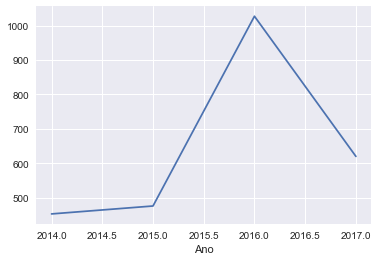

In [71]:
dadosSP.groupby(dadosSP.Ano.dt.year).Espanhol.mean().plot()

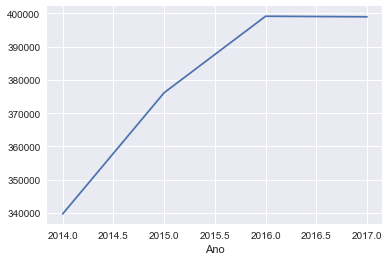

In [72]:
dadosSP.groupby(dadosSP.Ano.dt.year).Chegadas_Argentina.mean().plot()

## Análise dos Dados Paraná

## 2014
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>PR</strong></p>

In [73]:
dadosPR_2014 = dados2014(dados_2014,'PR')
dadosPR_2014

,Alemão,Dinamarquês,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Ano
0,37.0,0.0,246.0,30.0,0.0,271.0,31.0,17.0,2.0,2.0,0.0,2014


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>PR</strong></p>

In [74]:
chegadas2014PR = ano(media(AnaliseChegadas(chegadas2014,'Paraná')),'2014')
chegadas2014PR

,Chegadas,Ano
0,273817.0,2014


## 2015
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>PR</strong></p>

In [75]:
dadosPR_2015 = dados2015(dados_2015,'PR')
dadosPR_2015

,Alemão,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,34.0,261.0,31.0,2.0,275.0,35.0,18.0,4.0,5.0,2015


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>PR</strong></p>

In [76]:
chegadas2015PR = ano(media(AnaliseChegadas(chegadas2015,'Paraná')),'2015')
chegadas2015PR

,Chegadas,Ano
0,257355.0,2015


## 2016
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>PR</strong></p>

In [77]:
dadosPR_2016 = dados2016(dados_2016,'PR')
dadosPR_2016

,Alemão,Catalão,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,79.0,0.0,1.0,562.0,65.0,4.0,598.0,80.0,34.0,8.0,11.0,2016


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>PR</strong></p>

In [78]:
chegadas2016PR = ano(media(AnaliseChegadas(chegadas2016,'Paraná')),'2016')
chegadas2016PR

,Chegadas,Ano
0,274811.0,2016


## 2017
<p><strong>Quantidade</strong> de <strong>Hospedagens</strong> que oferecem <strong>X idioma estrangeiro</strong> em <strong>PR</strong></p>

In [79]:
dadosPR_2017 = dados2017(dados_2017,'PR')
dadosPR_2017

,Alemão,Catalão,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Ano
0,47.0,0.0,1.0,323.0,40.0,3.0,354.0,51.0,21.0,4.0,6.0,2017


<p><strong>Média da quantidade</strong> de <strong>Turistas</strong> que chegaram em <strong>PR</strong></p>

In [80]:
chegadas2017PR = ano(media(AnaliseChegadas(chegadas2017,'Paraná')),'2017')
chegadas2017PR

,Chegadas,Ano
0,351206.0,2017


### Dataframe com os valores dos anos 2014-2017 | PR

In [81]:
dados_Hospedagens_PR = Dados(dadosPR_2014,dadosPR_2015,dadosPR_2016,dadosPR_2017)
dados_Hospedagens_PR

C:\Users\Usuário\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,Alemão,Ano,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco
0,37.0,2014,NaN,0.0,NaN,246.0,30.0,0.0,271.0,31.0,17.0,2.0,2.0,0.0
0,34.0,2015,NaN,NaN,NaN,261.0,31.0,2.0,275.0,35.0,18.0,4.0,5.0,NaN
0,79.0,2016,0.0,NaN,1.0,562.0,65.0,4.0,598.0,80.0,34.0,8.0,11.0,NaN
0,47.0,2017,0.0,NaN,1.0,323.0,40.0,3.0,354.0,51.0,21.0,4.0,6.0,NaN


In [82]:
dados_Chegadas_PR = Dados(chegadas2014PR,chegadas2015PR,chegadas2016PR,chegadas2017PR)
dados_Chegadas_PR

,Chegadas,Ano
0,273817.0,2014
0,257355.0,2015
0,274811.0,2016
0,351206.0,2017


In [83]:
dadosPR = pd.merge(dados_Hospedagens_PR,dados_Chegadas_PR,how='outer')
dadosPR.rename(columns={'Chegadas': 'Chegadas_Argentina'}, inplace=True)
dadosPR

,Alemão,Ano,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Chegadas_Argentina
0,37.0,2014,NaN,0.0,NaN,246.0,30.0,0.0,271.0,31.0,17.0,2.0,2.0,0.0,273817.0
1,34.0,2015,NaN,NaN,NaN,261.0,31.0,2.0,275.0,35.0,18.0,4.0,5.0,NaN,257355.0
2,79.0,2016,0.0,NaN,1.0,562.0,65.0,4.0,598.0,80.0,34.0,8.0,11.0,NaN,274811.0
3,47.0,2017,0.0,NaN,1.0,323.0,40.0,3.0,354.0,51.0,21.0,4.0,6.0,NaN,351206.0


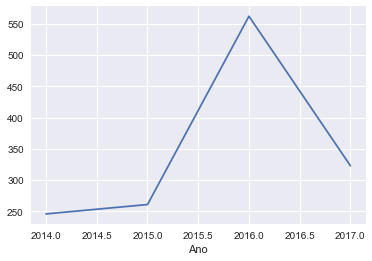

In [84]:
dadosPR.groupby(dadosPR.Ano.dt.year).Espanhol.mean().plot()

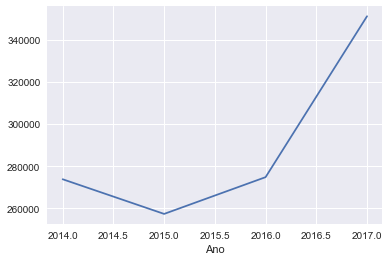

In [85]:
dadosPR.groupby(dadosPR.Ano.dt.year).Chegadas_Argentina.mean().plot()

## Análise 

In [86]:
display(dadosPR.dtypes,dadosSP.dtypes,dadosRJ.dtypes,dadosRS.dtypes)

Alemão                float64
Ano                    object
Catalão               float64
Dinamarquês           float64
Eslovaco              float64
Espanhol              float64
Francês               float64
Hebraico              float64
Inglês                float64
Italiano              float64
Japonês               float64
Mandarim              float64
Russo                 float64
Sueco                 float64
Chegadas_Argentina    float64
dtype: object

Alemão                float64
Ano                    object
Catalão               float64
Dinamarquês           float64
Eslovaco              float64
Espanhol              float64
Francês               float64
Hebraico              float64
Inglês                float64
Italiano              float64
Japonês               float64
Mandarim              float64
Russo                 float64
Sueco                 float64
Chegadas_Argentina    float64
dtype: object

Alemão                float64
Ano                    object
Catalão               float64
Dinamarquês           float64
Eslovaco              float64
Espanhol              float64
Francês               float64
Hebraico              float64
Inglês                float64
Italiano              float64
Japonês               float64
Mandarim              float64
Russo                 float64
Sueco                 float64
Chegadas_Argentina    float64
dtype: object

Alemão                float64
Ano                    object
Catalão               float64
Dinamarquês           float64
Eslovaco              float64
Espanhol              float64
Francês               float64
Hebraico              float64
Inglês                float64
Italiano              float64
Japonês               float64
Mandarim              float64
Russo                 float64
Sueco                 float64
Chegadas_Argentina    float64
dtype: object

## Grafico das Hospedagens
Mostra a quantidade de hospedagens ,que oferecem X idioma, no intervalo de Tempo 2014-2017

In [87]:
dadosRS.set_index('Ano', inplace=True)
display(dadosRS.head())

,Alemão,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Chegadas_Argentina
Ano,,,,,,,,,,,,,,
2014,80.0,NaN,0.0,NaN,360.0,25.0,0.0,310.0,51.0,1.0,2.0,2.0,0.0,679138.0
2015,61.0,NaN,NaN,NaN,281.0,20.0,0.0,262.0,41.0,1.0,3.0,2.0,NaN,856645.0
2016,116.0,0.0,NaN,0.0,534.0,36.0,0.0,512.0,75.0,2.0,5.0,4.0,NaN,895937.0
2017,72.0,0.0,NaN,0.0,301.0,21.0,0.0,288.0,40.0,1.0,2.0,2.0,NaN,1021639.0


Text(0.5,1,'Distribuição da Quantidade de Hospedagens do Rio Grande do Sul')

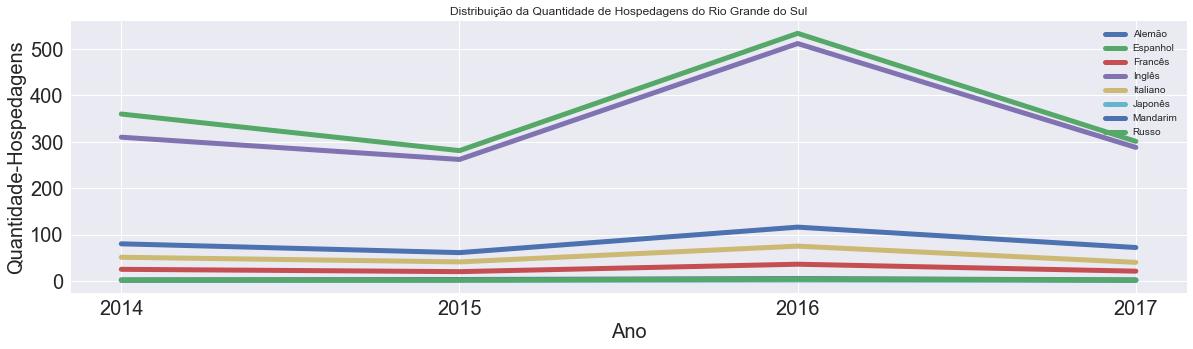

In [88]:
dadosRS[['Alemão','Espanhol','Francês','Inglês','Italiano','Japonês','Mandarim','Russo']].plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Ano', fontsize=20);
plt.ylabel('Quantidade-Hospedagens', fontsize=20);
plt.title('Distribuição da Quantidade de Hospedagens do Rio Grande do Sul')

In [89]:
dadosPR.set_index('Ano', inplace=True)
dadosPR.head()

,Alemão,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Chegadas_Argentina
Ano,,,,,,,,,,,,,,
2014,37.0,NaN,0.0,NaN,246.0,30.0,0.0,271.0,31.0,17.0,2.0,2.0,0.0,273817.0
2015,34.0,NaN,NaN,NaN,261.0,31.0,2.0,275.0,35.0,18.0,4.0,5.0,NaN,257355.0
2016,79.0,0.0,NaN,1.0,562.0,65.0,4.0,598.0,80.0,34.0,8.0,11.0,NaN,274811.0
2017,47.0,0.0,NaN,1.0,323.0,40.0,3.0,354.0,51.0,21.0,4.0,6.0,NaN,351206.0


Text(0.5,1,'Distribuição da Quantidade de Hospedagens do Paraná')

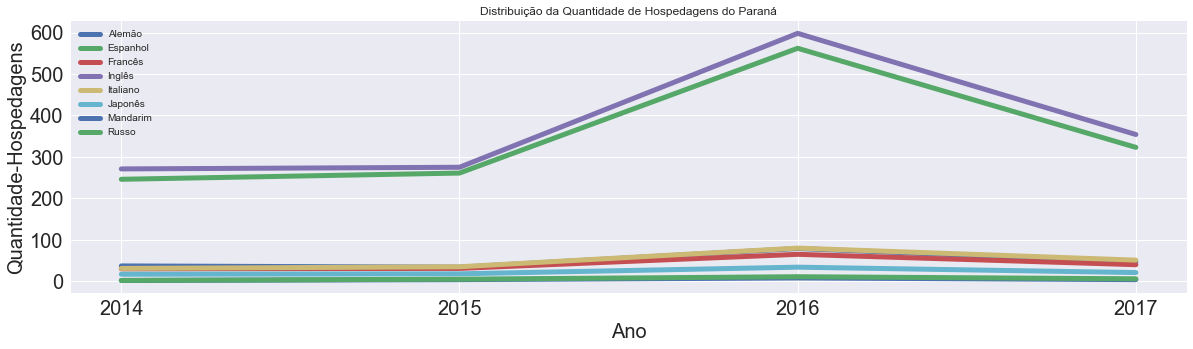

In [90]:
dadosPR[['Alemão','Espanhol','Francês','Inglês','Italiano','Japonês','Mandarim','Russo']].plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Ano', fontsize=20);
plt.ylabel('Quantidade-Hospedagens', fontsize=20);
plt.title('Distribuição da Quantidade de Hospedagens do Paraná')

In [91]:
dadosSP.set_index('Ano', inplace=True)
dadosSP.head()

,Alemão,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Chegadas_Argentina
Ano,,,,,,,,,,,,,,
2014,33.0,NaN,0.0,NaN,453.0,70.0,3.0,648.0,52.0,41.0,4.0,4.0,0.0,339756.0
2015,29.0,NaN,NaN,NaN,476.0,78.0,2.0,687.0,50.0,39.0,5.0,6.0,NaN,376133.0
2016,63.0,0.0,NaN,0.0,1027.0,165.0,4.0,1478.0,119.0,87.0,9.0,11.0,NaN,399092.0
2017,42.0,0.0,NaN,0.0,620.0,99.0,3.0,891.0,76.0,48.0,4.0,8.0,NaN,398926.0


Text(0.5,1,'Distribuição da Quantidade de Hospedagens do São Paulo')

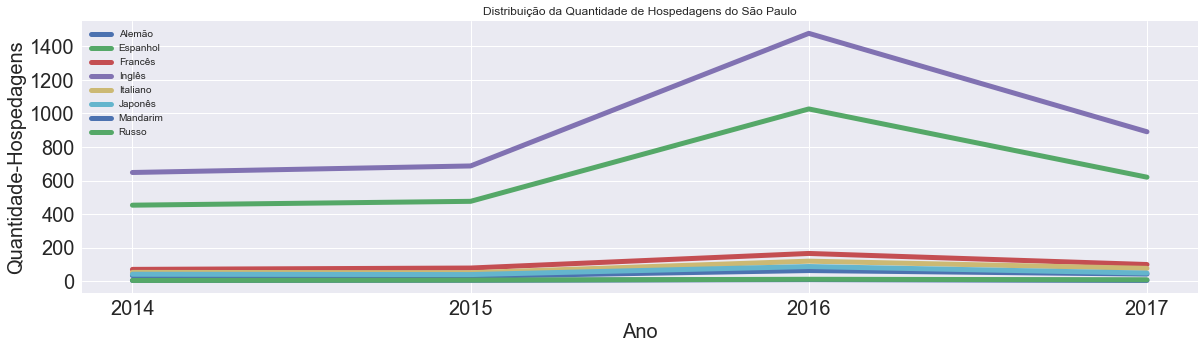

In [92]:
dadosSP[['Alemão','Espanhol','Francês','Inglês','Italiano','Japonês','Mandarim','Russo']].plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Ano', fontsize=20);
plt.ylabel('Quantidade-Hospedagens', fontsize=20);
plt.title('Distribuição da Quantidade de Hospedagens do São Paulo')

In [93]:
dadosRJ.set_index('Ano', inplace=True)
dadosRJ.head()

,Alemão,Catalão,Dinamarquês,Eslovaco,Espanhol,Francês,Hebraico,Inglês,Italiano,Japonês,Mandarim,Russo,Sueco,Chegadas_Argentina
Ano,,,,,,,,,,,,,,
2014,57.0,NaN,0.0,NaN,450.0,146.0,3.0,564.0,79.0,6.0,1.0,9.0,0.0,284795.0
2015,52.0,NaN,NaN,NaN,434.0,135.0,5.0,534.0,75.0,5.0,1.0,9.0,NaN,342765.0
2016,107.0,0.0,NaN,0.0,952.0,301.0,9.0,1197.0,162.0,18.0,5.0,21.0,NaN,377677.0
2017,56.0,0.0,NaN,0.0,616.0,186.0,4.0,764.0,94.0,12.0,3.0,12.0,NaN,452842.0


Text(0.5,1,'Distribuição da Quantidade de Hospedagens Rio de Janeiro')

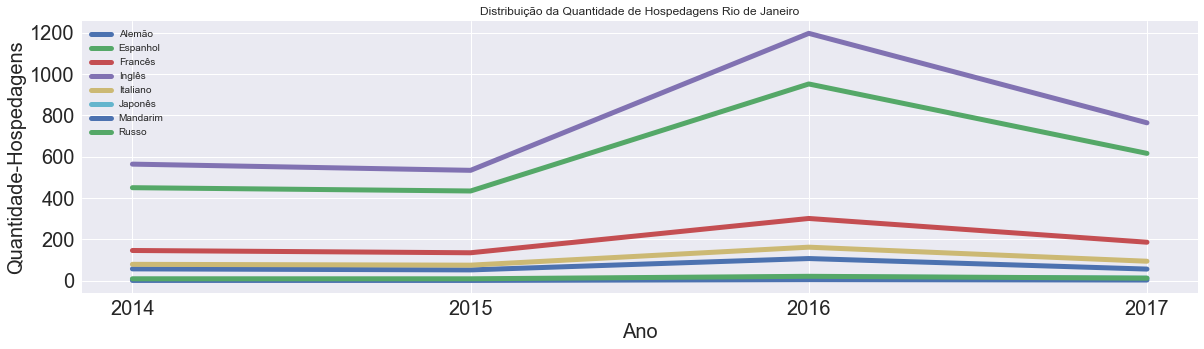

In [94]:
dadosRJ[['Alemão','Espanhol','Francês','Inglês','Italiano','Japonês','Mandarim','Russo']].plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Ano', fontsize=20);
plt.ylabel('Quantidade-Hospedagens', fontsize=20);
plt.title('Distribuição da Quantidade de Hospedagens Rio de Janeiro')

## Grafico de Chegada de Turistas
Mostra como está o fluxo de turistas no intervalo 2014-2017

Text(0.5,1,'Distribuição da Quantidade de Turistas do Rio de Janeiro')

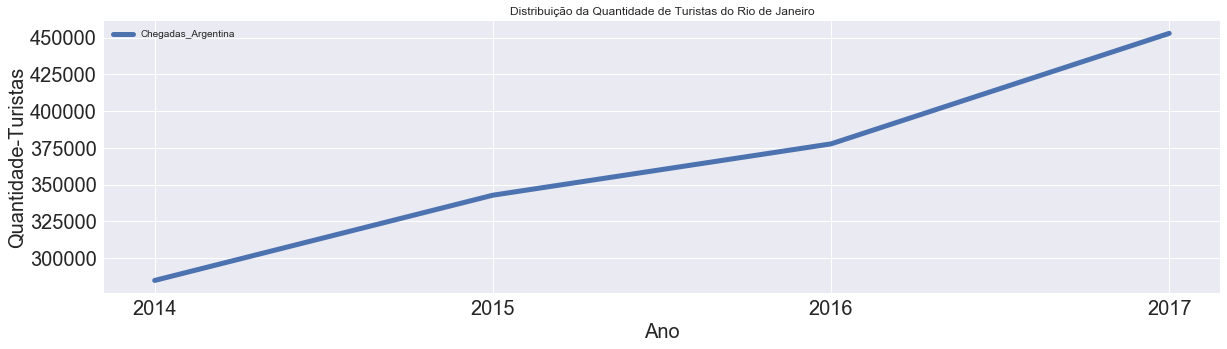

In [95]:
dadosRJ[['Chegadas_Argentina']].plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Ano', fontsize=20);
plt.ylabel('Quantidade-Turistas', fontsize=20);
plt.title('Distribuição da Quantidade de Turistas do Rio de Janeiro')

Text(0.5,1,'Distribuição da Quantidade de Turistas do Rio Grande do Sul')

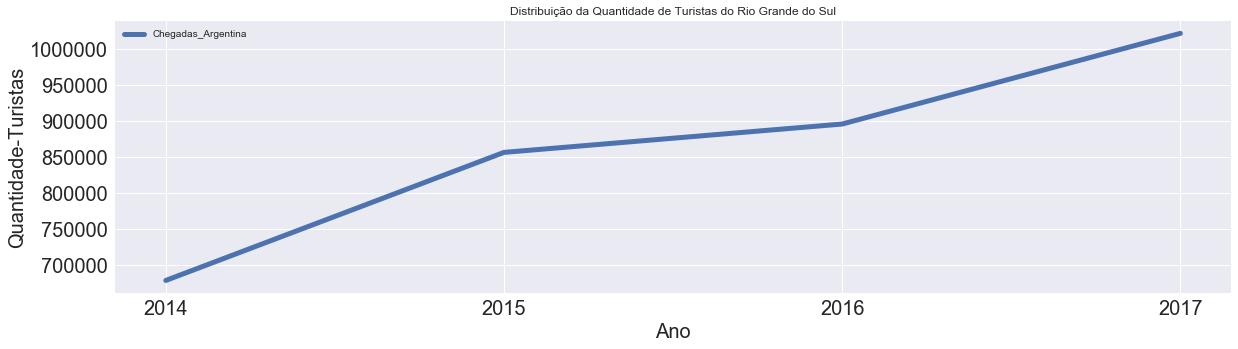

In [96]:
dadosRS[['Chegadas_Argentina']].plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Ano', fontsize=20);
plt.ylabel('Quantidade-Turistas', fontsize=20);
plt.title('Distribuição da Quantidade de Turistas do Rio Grande do Sul')

Text(0.5,1,'Distribuição da Quantidade de Turistas do São Paulo')

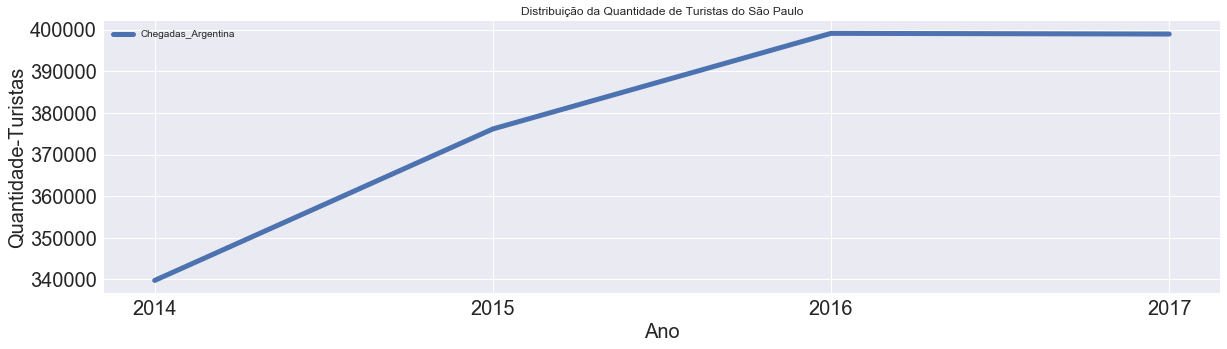

In [97]:
dadosSP[['Chegadas_Argentina']].plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Ano', fontsize=20);
plt.ylabel('Quantidade-Turistas', fontsize=20);
plt.title('Distribuição da Quantidade de Turistas do São Paulo')

Text(0.5,1,'Distribuição da Quantidade de Turistas do Paraná')

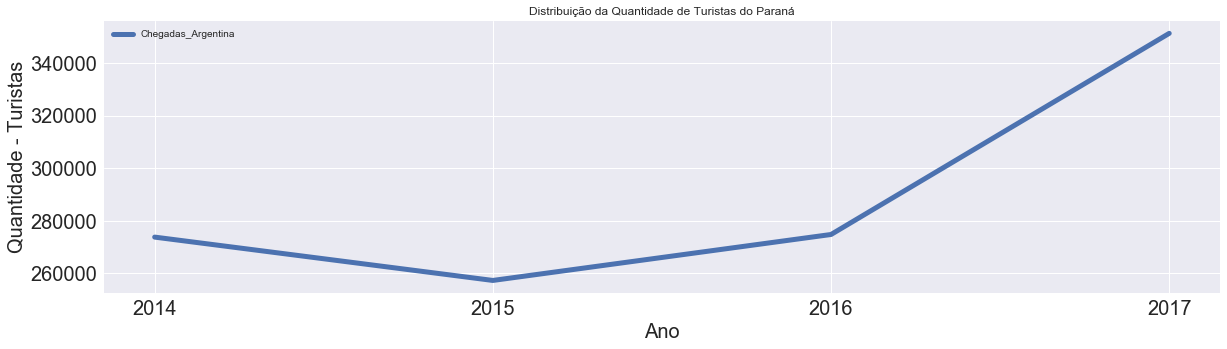

In [98]:
dadosPR[['Chegadas_Argentina']].plot(figsize=(20,5), linewidth=5, fontsize=20)
plt.xlabel('Ano', fontsize=20);
plt.ylabel('Quantidade - Turistas', fontsize=20);
plt.title('Distribuição da Quantidade de Turistas do Paraná')